In [84]:
# Importamos las librerias necesarias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [85]:
# Cargar el conjunto de datos CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

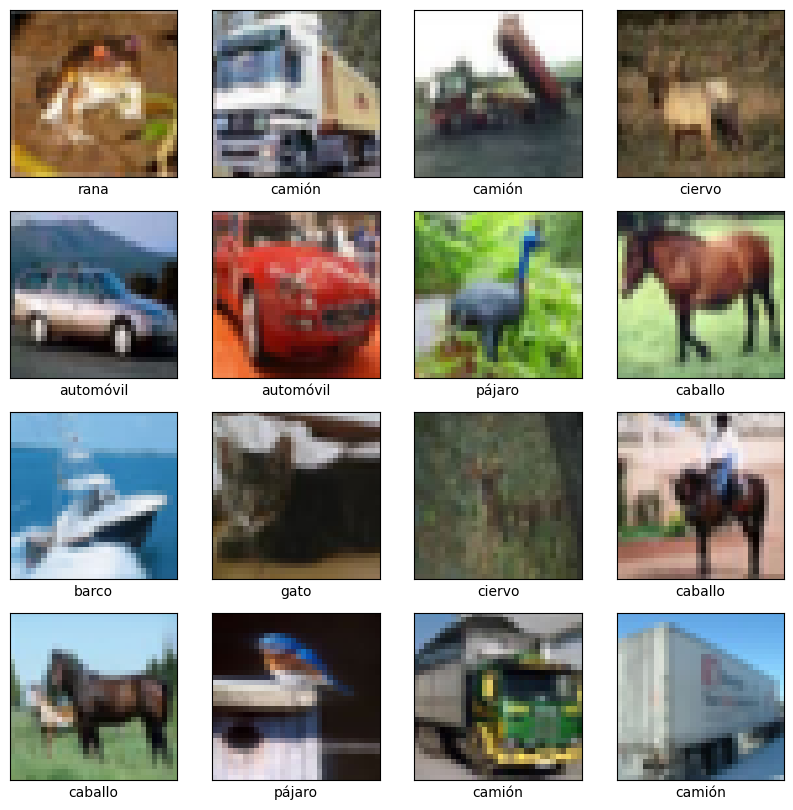

In [86]:
# Nombres de las clases en español
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 
               'perro', 'rana', 'caballo', 'barco', 'camión']

# Mostrar las primeras 16 imágenes del conjunto de entrenamiento
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [87]:
# Definir la arquitectura mejorada de la CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Asumiendo que hay 10 clases
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [88]:
# Resumen del modelo
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
# Definir callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
]

# Entrenar el modelo
history = model.fit(
    train_images, train_labels, 
    epochs=30,  # Aumentar el número de epochs para un mejor entrenamiento
    validation_data=(test_images, test_labels),
    batch_size=64,  # Ajustar el tamaño del lote para optimizar el uso de la GPU
    callbacks=callbacks
)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.3241 - loss: 1.8226 - val_accuracy: 0.5188 - val_loss: 1.3354 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5497 - loss: 1.2742 - val_accuracy: 0.5850 - val_loss: 1.1757 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6127 - loss: 1.1053 - val_accuracy: 0.6153 - val_loss: 1.0807 - learning_rate: 0.0010
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6578 - loss: 0.9861 - val_accuracy: 0.6510 - val_loss: 0.9946 - learning_rate: 0.0010
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6856 - loss: 0.9043 - val_accuracy: 0.6626 - val_loss: 0.9517 - learning_rate: 0.0010
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7093 - loss: 0.8402 - val_accuracy: 0.6755 - val_loss: 0.9404 - learning_rate: 0.0010
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7339 - l

In [90]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nPrecisión en los datos de prueba: {test_acc:.2%}')

313/313 - 2s - 7ms/step - accuracy: 0.7079 - loss: 0.8776

Precisión en los datos de prueba: 70.79%

Precisión en los datos de prueba: 70.79%


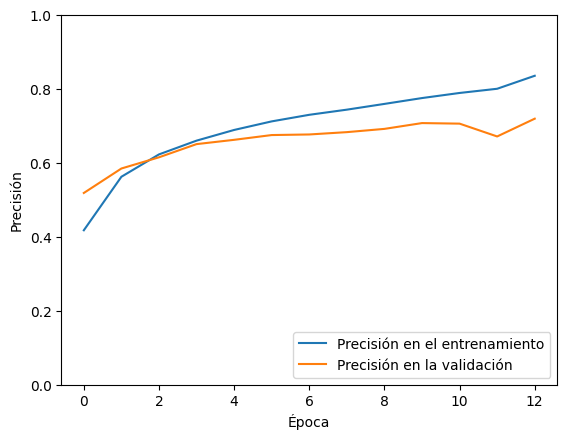

In [91]:
# Graficar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión en el entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en la validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [93]:
# Hacer predicciones
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    predictions_array = np.array(predictions_array)
    true_label = np.array(true_label)
    img = np.array(img)
    
    # Asegúrate de que las entradas sean escalares
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    true_label = true_label.item()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    predicted_label = predicted_label.item()
    
    color = 'blue' if predicted_label == true_label else 'red'
    
    plt.xlabel(f"{class_names[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({class_names[int(true_label)]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array = np.array(predictions_array)
    true_label = np.array(true_label)
    
    predictions_array, true_label = predictions_array[i], true_label[i]
    true_label = true_label.item()
    
    plt.grid(False)
    plt.xticks(range(len(class_names)))
    plt.yticks([])
    thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)
    predicted_label = predicted_label.item()
    
    thisplot[int(predicted_label)].set_color('red')
    thisplot[int(true_label)].set_color('blue')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


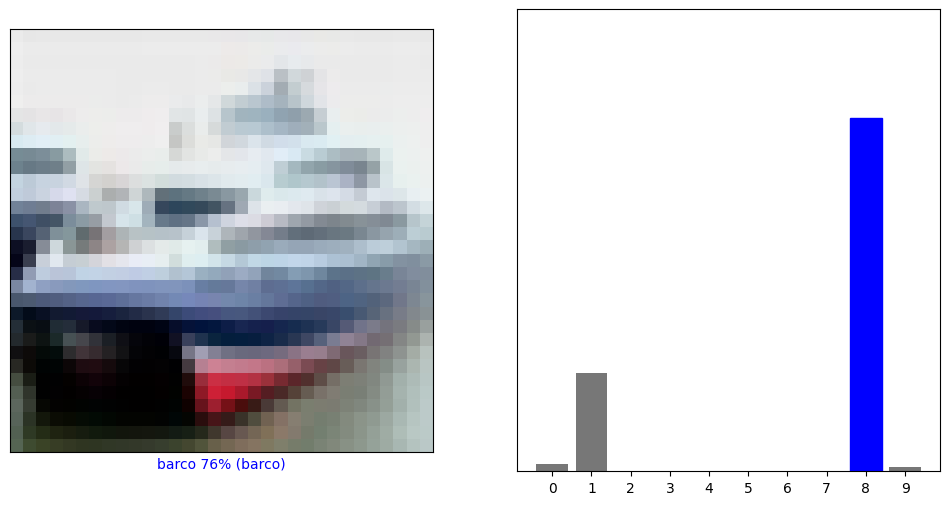

In [99]:
# Mostrar predicciones para la primera imagen de prueba
i = 1
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

In [103]:
#Guarda el código en un modelo para su uso posterior
model.save('cifar10_model.keras')
print('Modelo guardado en cifar10_model.keras')

Modelo guardado en cifar10_model.keras
